In [7]:
import scipy.io
data = scipy.io.loadmat('../../data/url.mat')
#'../../data/url.mat'

**create list for labels and data, where one entry is the data for the day with this index**

In [8]:
import numpy as np

num_of_days = 120
X, Y = [], []

for i in range(num_of_days):
    day_data = data["Day" + str(i)]
    X.append(day_data[0][0][0])
    Y.append(day_data[0][0][1])

In [9]:
for i in range(len(Y)):
    Y[i] = Y[i].ravel()

**continous learn classifier**

In [10]:
# incremental learns classifier (must have partial_fit() function)
# returns an array of cumulative error rates for each day
def learn_incremental(clf, batch_size = 1000):
    
    #print("Batch size {}".format(batch_size))
    error_rates = []
    num_of_days = 120
    err = 0
    
    for curr_day in range(num_of_days): # looping through days
    
        if (curr_day != 45):
            X_curr_day = X[curr_day]
    
            # split the data in slices of batch_size
            batches_amount = int(X_curr_day.shape[0] / batch_size)
            Y_curr_day = np.array_split(Y[curr_day], batches_amount)
    
            for j in range(batches_amount): # looping through individual urls
                select_ind = np.arange(j * batch_size, (j+1) * batch_size)
        
                X_curr_url_batch, Y_curr_url_batch = X_curr_day[select_ind,:], Y_curr_day[j] 
        
                if (j > 0):
                    Y_preds = clf.predict(X_curr_url_batch)
            
                    for k in range(batch_size):
                        if(Y_preds[k] != Y_curr_url_batch[k]):
                            err = err + 1
        
                clf.partial_fit(X_curr_url_batch, Y_curr_url_batch, classes=list(range(2))) # Continous fitting of urls and label
            
            print("Log: Day {}: {}".format(curr_day ,err / X_curr_day.shape[0]))
            error_rates.append(err / X_curr_day.shape[0])
            err = 0
    return error_rates

### Batch-size and other global variables and imports:

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

batch_size = 4

# Initialize error rates of the different classifiers
error_rates_pa = None
error_rates_percep = None
error_rates_lrsgd = None

### Perceptron

In [12]:
clf = Perceptron(random_state = 123)

error_rates_percep = learn_incremental(clf, batch_size)

cnt = 0
for x in error_rates_percep:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Log: Day 0: 0.051375
Log: Day 1: 0.03565
Log: Day 2: 0.0252
Log: Day 3: 0.0267
Log: Day 4: 0.0305
Log: Day 5: 0.0239
Log: Day 6: 0.0233
Log: Day 7: 0.02805
Log: Day 8: 0.02575
Log: Day 9: 0.03235
Log: Day 10: 0.029
Log: Day 11: 0.02535
Log: Day 12: 0.02515
Log: Day 13: 0.0192
Log: Day 14: 0.0241
Log: Day 15: 0.0184
Log: Day 16: 0.0221
Log: Day 17: 0.0204
Log: Day 18: 0.02065
Log: Day 19: 0.0184
Log: Day 20: 0.0194
Log: Day 21: 0.02545
Log: Day 22: 0.0216
Log: Day 23: 0.02355
Log: Day 24: 0.0276
Log: Day 25: 0.0294
Log: Day 26: 0.0171
Log: Day 27: 0.02115
Log: Day 28: 0.0226
Log: Day 29: 0.0245
Log: Day 30: 0.0292
Log: Day 31: 0.0255
Log: Day 32: 0.0259
Log: Day 33: 0.02375
Log: Day 34: 0.0006
Log: Day 35: 0.0302
Log: Day 36: 0.0028
Log: Day 37: 0.00025
Log: Day 38: 0.0371
Log: Day 39: 0.0317
Log: Day 40: 0.0249
Log: Day 41: 0.018
Log: Day 42: 0.0258
Log: Day 43: 0.0232
Log: Day 44: 0.01345
Log: Day 46: 0.0214
Log: Day 47: 0.02005
Log: Day 48: 0.0239
Log: Day 49: 0.0276
Log: Day 50: 0.0

### LrSGD

In [13]:
clf = SGDClassifier(loss = 'log', alpha=0.001)

error_rates_lrsgd = learn_incremental(clf, batch_size)

cnt = 0
for x in error_rates_lrsgd:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Log: Day 0: 0.0448125
Log: Day 1: 0.0263
Log: Day 2: 0.01785
Log: Day 3: 0.02035
Log: Day 4: 0.02325
Log: Day 5: 0.021
Log: Day 6: 0.0209
Log: Day 7: 0.0233
Log: Day 8: 0.0232
Log: Day 9: 0.0266
Log: Day 10: 0.0251
Log: Day 11: 0.0223
Log: Day 12: 0.02365
Log: Day 13: 0.01885
Log: Day 14: 0.02425
Log: Day 15: 0.0199
Log: Day 16: 0.0214
Log: Day 17: 0.02085
Log: Day 18: 0.0215
Log: Day 19: 0.01955
Log: Day 20: 0.0225
Log: Day 21: 0.02935
Log: Day 22: 0.0269
Log: Day 23: 0.0281
Log: Day 24: 0.03095
Log: Day 25: 0.02925
Log: Day 26: 0.0207
Log: Day 27: 0.0274
Log: Day 28: 0.0255
Log: Day 29: 0.02725
Log: Day 30: 0.03525
Log: Day 31: 0.031
Log: Day 32: 0.0292
Log: Day 33: 0.0293
Log: Day 34: 0.0009
Log: Day 35: 0.0364
Log: Day 36: 0.0073
Log: Day 37: 0.00265
Log: Day 38: 0.04755
Log: Day 39: 0.0425
Log: Day 40: 0.03145
Log: Day 41: 0.02685
Log: Day 42: 0.0341
Log: Day 43: 0.03175
Log: Day 44: 0.02055
Log: Day 46: 0.0259
Log: Day 47: 0.02475
Log: Day 48: 0.03445
Log: Day 49: 0.0355
Log: Day

### Passive Aggressive

In [14]:
clf = PassiveAggressiveClassifier(C=0.001, random_state = 123)

error_rates_pa = learn_incremental(clf, batch_size)

cnt = 0
for x in error_rates_pa:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Log: Day 0: 0.0489375
Log: Day 1: 0.0315
Log: Day 2: 0.02365
Log: Day 3: 0.0229
Log: Day 4: 0.0265
Log: Day 5: 0.02545
Log: Day 6: 0.0226
Log: Day 7: 0.0259
Log: Day 8: 0.0235
Log: Day 9: 0.02865
Log: Day 10: 0.0251
Log: Day 11: 0.02235
Log: Day 12: 0.02365
Log: Day 13: 0.01875
Log: Day 14: 0.02365
Log: Day 15: 0.01895
Log: Day 16: 0.02015
Log: Day 17: 0.01955
Log: Day 18: 0.01985
Log: Day 19: 0.0183
Log: Day 20: 0.0204
Log: Day 21: 0.0265
Log: Day 22: 0.0226
Log: Day 23: 0.02485
Log: Day 24: 0.0273
Log: Day 25: 0.02665
Log: Day 26: 0.0177
Log: Day 27: 0.02355
Log: Day 28: 0.0214
Log: Day 29: 0.02335
Log: Day 30: 0.03085
Log: Day 31: 0.0264
Log: Day 32: 0.0256
Log: Day 33: 0.0253
Log: Day 34: 0.00055
Log: Day 35: 0.03045
Log: Day 36: 0.00455
Log: Day 37: 0.001
Log: Day 38: 0.036
Log: Day 39: 0.03545
Log: Day 40: 0.0244
Log: Day 41: 0.02025
Log: Day 42: 0.0267
Log: Day 43: 0.0228
Log: Day 44: 0.01535
Log: Day 46: 0.02075
Log: Day 47: 0.01925
Log: Day 48: 0.0239
Log: Day 49: 0.02625
Log:

In [15]:
def cleanup(x, y):
    
    # Cleanup outliers in data
    outliers = []
    for i in range(len(y)):
        if (y[i] > 3.4 or y[i] < 0.5):
            outliers = np.append(outliers, i)
    
    offset = 0
    for outl in outliers:
        y = np.delete(y, int(outl) - offset)
        x = x[:-1]
        offset = offset + 1
        
    return x, y

In [16]:
def _calc_line(x, y):
    
    # create polynomial equation and calculate line
    theta = np.polyfit(x, y, 8)
    return theta[8] + theta[7] * pow(x, 1) + theta[6] * pow(x, 2) + theta[5] * pow(x, 3) + theta[4] * pow(x, 4) + theta[3] * pow(x, 5) + theta[2] * pow(x, 6) + theta[1] * pow(x, 7) + theta[0] * pow(x, 8)

In [17]:
def _plot(y, color, marker, linestyle, scatter, label):
    
    # Set up the day_indexes with the missing 45th day in mind
    x = np.arange(0, 120) 
    
    # attend to data size imbalances (day 45 outages)
    if (y.shape[0] < x.shape[0]):
        x = x[:-1]
        
    y = y * 100
    x, y = cleanup(x, y)
    
    if (scatter):
        plt.scatter(x, y)
        
    y = _calc_line(x, y)
    plt.plot(x, y, "{}{}{}".format(marker, color, linestyle), markevery=5, label=label)

In [18]:
import matplotlib.pyplot as plt

def plot8degree(error_rates_pa, error_rates_percep, error_rates_lrsgd,
                batch_size, scatter = False):

    if (error_rates_pa is not None):
        _plot(np.array(error_rates_pa), 'r', 'v', '-', scatter, "PA")
        
    if (error_rates_percep is not None):
        _plot(np.array(error_rates_percep), 'g', 'o', '-', scatter, "Perceptron")
        
    if (error_rates_lrsgd is not None):
        _plot(np.array(error_rates_lrsgd), 'b', 'x', '--', scatter, "LRsgd")
        
    title = 'Experiment 2 with batch size {}'.format(batch_size)
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Cumulative error rate (%)')
    plt.ylim([1,4])
    plt.xlim([0,100])
    plt.legend()
    plt.savefig("{}.svg".format(title), format='svg', dpi=1200)

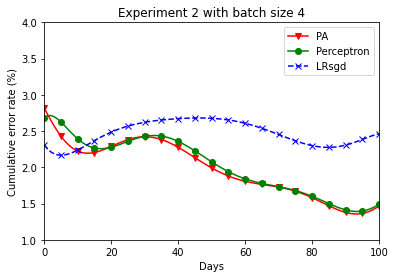

In [19]:
plot8degree(error_rates_pa, error_rates_percep, error_rates_lrsgd,
            batch_size, False)

In [20]:
## Does benefit model to cleanup outliers 35-45